In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
class WebScraper():
    def __init__(self):
        self.soup = BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/Urbanization_by_sovereign_state").content, 'html.parser')
    def extract_data(self):
        table = self.soup.find('table', class_= "wikitable sortable mw-datatable static-row-numbers col2right")
        data = []
        for info in table.find_all_next('tr'):
            items = info.text.split('\n')
            items_filtered = list(filter(lambda item: item != "", items))
            if len(items_filtered) != 4:
                break
            items_filtered = items_filtered[0:3]
            items_filtered[0] = items_filtered[0].replace('\xa0', '')
            items_filtered[1] = items_filtered[1].replace(',', '')
            data.append(items_filtered)
        for item in data[1:]:
            for i in range(1,3):
                try:
                    item[i] = int(item[i]) if i == 1 else float(item[i])
                except:
                    item[i] = np.nan
                    
        return data[0], data[1:]

In [3]:
scraper = WebScraper()

In [4]:
head, data = scraper.extract_data()

In [5]:
df = pd.DataFrame(data, columns=list(map(lambda string: string.split('  (')[0], head)))
df

,Country or territory,Urban population,% of total population
0,Kuwait,4268870.0,100.0
1,Monaco,36470.0,100.0
2,Nauru,12670.0,100.0
3,Singapore,5637020.0,100.0
4,Vatican City,NaN,100.0
...,...,...,...
223,Liechtenstein,5720.0,14.6
224,Papua New Guinea,1377570.0,13.7
225,Montserrat (UK),NaN,9.3
226,Tokelau (New Zealand),NaN,0.0


In [6]:
filtered_df = df[df["Urban population"].isna() == False][df["% of total population"].isna() == False].copy()

C:\Users\javan\AppData\Local\Temp\ipykernel_9624\2228897074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df[df["Urban population"].isna() == False][df["% of total population"].isna() == False].copy()


In [7]:
filtered_df

,Country or territory,Urban population,% of total population
0,Kuwait,4268870.0,100.0
1,Monaco,36470.0,100.0
2,Nauru,12670.0,100.0
3,Singapore,5637020.0,100.0
6,Bermuda (UK),63530.0,100.0
...,...,...,...
220,Samoa,39170.0,17.5
221,Niger,4427580.0,17.1
222,Burundi,1858290.0,14.8
223,Liechtenstein,5720.0,14.6


C:\Users\javan\AppData\Local\Temp\ipykernel_9624\585390819.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.barplot(filtered_df[filtered_df["% of total population"] > 80.0][filtered_df["% of total population"] < 85.0]


<Axes: xlabel='Country or territory', ylabel='Urban population'>

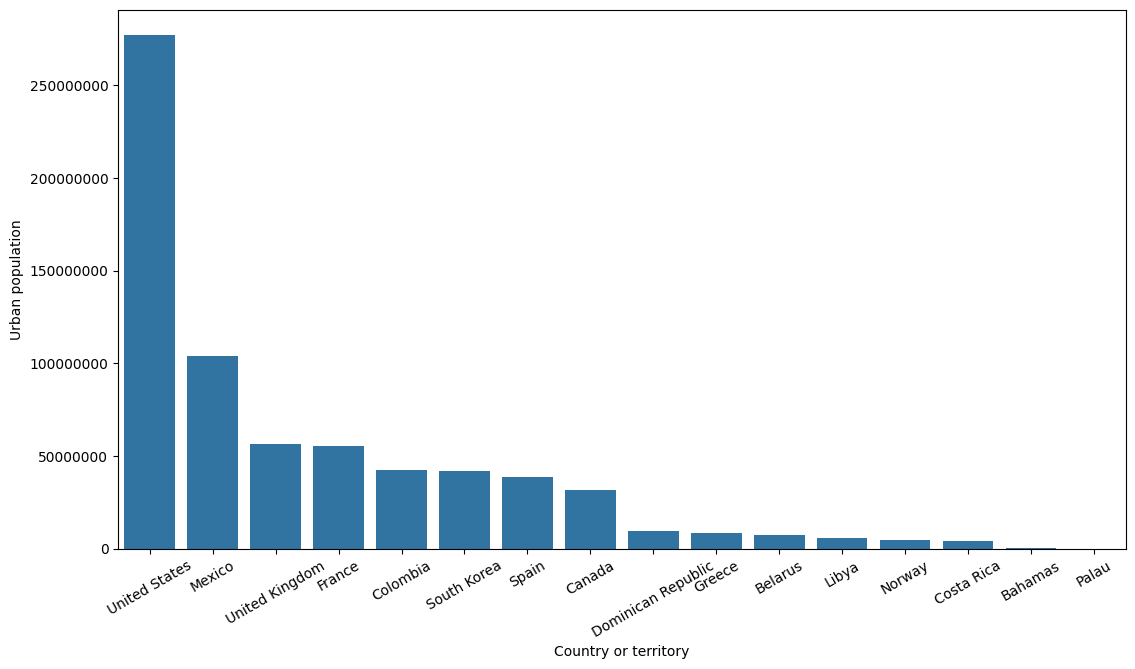

In [10]:
fig, ax = plt.subplots(figsize=(13,7))
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain')
sns.barplot(filtered_df[filtered_df["% of total population"] > 80.0][filtered_df["% of total population"] < 85.0]
            .sort_values(by=["Urban population"], ascending=False),
            x="Country or territory", y="Urban population")